<img src="images/kapak_proje.png"/>

# <font color='blue'>1) VERİYİ TANIMA VE GÖRSELLEŞTİRME

In [4]:
# pandas = veri işlenmesi ve analzi
# napy : matematıksel hesaplamaları ağlar 
# seaborn: veri görselleştirme kutuhanessi

import pandas as pd;
import numpy as np;
import seaborn as sbn;

# veri görselleştirme için
%matplotlib inline

In [5]:
data = pd.read_csv('ComputerPricesData.csv')

In [6]:
data.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [7]:
data.shape

(6259, 10)

In [8]:
data.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [9]:
# fiyat : Bilgisayarın fiyatı
# hız : hız
# hd : Ne kadar sabit disk var
# ram : Bilgisayarda ne kadar ram var
# ekran : Ekran boyutu
# cd : CD çaların mevcut olup olmadığı
# multi : Birden fazla bağlantı noktası var mı yok mu
# premium : Bilgisayar üstün kalitesi avr mı yok mu
# ads : Bilgisayarın reklam değeri
# trend : Bilgisayarın trend değeri

In [18]:
# culmları isimlerini türkçe yaptık

data.columns = ["fiyat","hız","sbt_disk","ram","ekran_boyutu","cd","multi_port","üstün_kalite","reklam_degeri","trend_degeri"];

In [19]:
# veri setini ilk 7 satırını görüntuleme

data.head(7)

,fiyat,hız,sbt_disk,ram,ekran_boyutu,cd,multi_port,üstün_kalite,reklam_degeri,trend_degeri
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
5,3695,66,340,16,14,no,no,yes,94,1
6,1720,25,170,4,14,yes,no,yes,94,1


In [20]:
# Varsa tekrarlanan satırları kaldırma
# 76 tekrar eden satırımız var 

data = data.drop_duplicates()
data.shape

(6183, 10)

<AxesSubplot: >

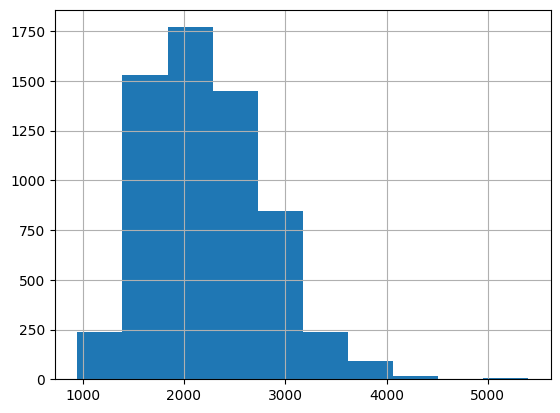

In [13]:
# Hedef değişken Sürekli olduğundan Histogram oluşturma

%matplotlib inline
data['fiyat'].hist()

<AxesSubplot: xlabel='fiyat', ylabel='Density'>

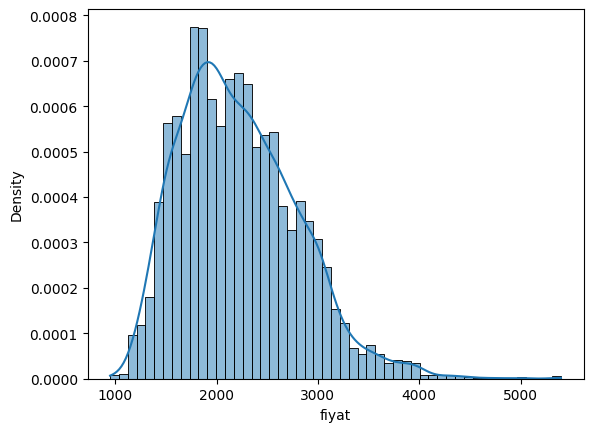

In [14]:
# disnity = yuğunluk
# Fiyat özniteliğimizin sayısına göre dağılımı

sbn.histplot(data["fiyat"], kde=True,stat="density")

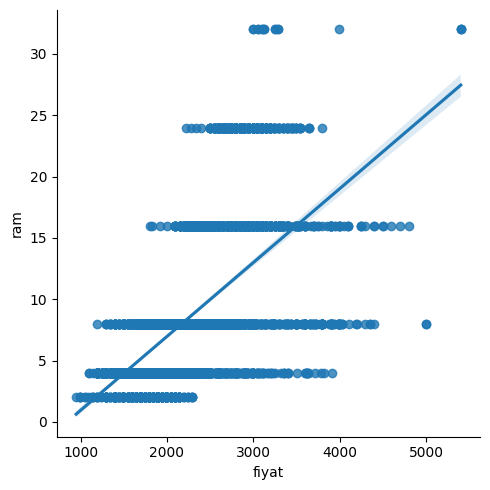

In [17]:
sbn.lmplot(x='fiyat', y='ram',data = data)

# <font color='red'>Heat map


C:\Users\ozbdk\AppData\Local\Temp\ipykernel_8952\185989679.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<AxesSubplot: >

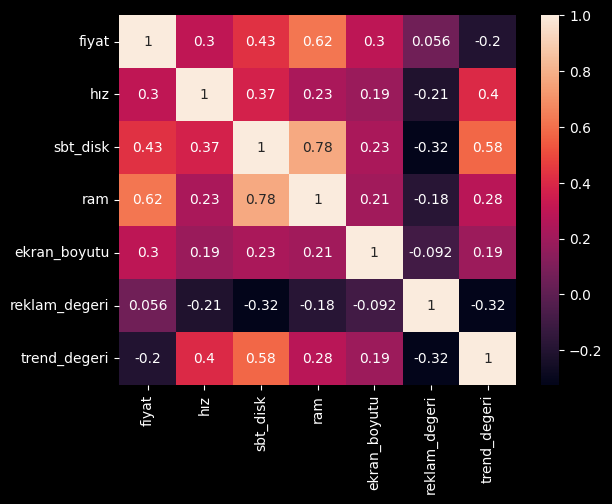

In [169]:
# heat map

# annot = açıklama
cor = data.corr()

sbn.heatmap(cor,annot=True)


# YORUM => reklam_degeri ve tren_degeri diğer columnlarla işilkisi - oldugu için etkisiz eleman


In [104]:
# head() : Bu, verilerin birkaç örnek satırını görmeye yardımcı olur
# info() : Bu, verilerin özetlenmiş bilgilerini sağlar
# define() : Bu, verilerin açıklayıcı istatistiksel ayrıntılarını sağlar
# nunique(): Bu, bir sütunun kategorik mi yoksa sürekli mi olduğunu belirlememize yardımcı olur.


# <font color='red'>Verilerin özetlenmiş bilgilerinin gözlemlenmesi


In [105]:
# Veri türleri, Boş olmayan değerlerin sayısına ve toplam satırlara göre eksik değerler vb.
# Çok fazla eksik değeri olan verilerden bu değişkenleri kaldırın (Eksik Değerler > %30)
# Makine Öğreniminde kullanılamayan Niteliksel değişkenleri kaldırın

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6183 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          6183 non-null   int64 
 1   hız            6183 non-null   int64 
 2   sbt_disk       6183 non-null   int64 
 3   ram            6183 non-null   int64 
 4   ekran_boyutu   6183 non-null   int64 
 5   cd             6183 non-null   object
 6   multi_port     6183 non-null   object
 7   üstün_kalite   6183 non-null   object
 8   reklam_degeri  6183 non-null   int64 
 9   trend_degeri   6183 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 531.4+ KB


# <font color='red'>Nan deger kontrolu

In [107]:
# nan deger kontrolu
data.isna().sum()

fiyat            0
hız              0
sbt_disk         0
ram              0
ekran_boyutu     0
cd               0
multi_port       0
üstün_kalite     0
reklam_degeri    0
trend_degeri     0
dtype: int64

# <font color='red'>Veriyi describe etme

In [108]:
# Veri Setindeki verilerin açıklamasını döndürür. Boş olmayan değerlerin sayısı, 
# Ortalama değer, Standart sapma, Max-Min değerleri gibi.

data.describe()

,fiyat,hız,sbt_disk,ram,ekran_boyutu,reklam_degeri,trend_degeri
count,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000,6183.000000
mean,2221.837943,52.129549,417.760796,8.305353,14.614265,220.906033,15.944364
std,582.042129,21.190655,259.458342,5.649178,0.907304,74.958628,7.903073
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.000000,10.000000
50%,2145.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,22.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


# <font color='red'>Temel Veri Keşfi Sonuçları


In [171]:
# benzersiz değerlerin sayısı

data.nunique()

fiyat            808
hız                6
sbt_disk          59
ram                6
ekran_boyutu       3
cd                 2
multi_port         2
üstün_kalite       2
reklam_degeri     34
trend_degeri      35
dtype: int64

In [172]:
# Her sütun için benzersiz değerler
# Hangi kolonun kategorik hangisinin Sürekli olduğunu anlamak için

# Tipik olarak, benzersiz değerlerin sayısı < 20 ise değişken muhtemelen bir kategoridir, aksi halde süreklidir

# ****Temel Veri Keşfi Sonuçları****

# Y# ukarıdaki temel araştırmaya dayanarak, artık her bir sütunla ilgili gözlemlerinizi not ederek 
# verilerin basit bir raporunu oluşturabilirsiniz. Bu nedenle, daha fazla analiz için bir ilk yol haritası oluşturmak.
# Bu adımda seçilen sütunlar nihai değildir, daha fazla çalışma yapılacak ve ardından nihai bir liste oluşturulacaktır.


# fiyat        => Sürekli. Seçildi.Bu, Hedef Değişkendir!           
# hız          => Sürekli. Seçildi             
# sbt_disk      => Sürekli. Seçildi
# reklam_degeri => Sürekli. Seçildi    
# trend_degeri => Sürekli. Seçildi  

## ram          => Kategorik. Seçildi       
## ekran_boyutu => Kategorik. Seçildi      
## cd           => Kategorik. Seçildi     
## multi_port   => Kategorik. Seçildi     
## üstün_kalite => Kategorik. Seçildi    



In [110]:
# *****Gereksiz sütunları verilerden kaldırma****
# Bu verilerde nitel sütun yok

# <font color='red'>Görsel Keşfi Veri Analizi


In [111]:
# ****Görsel Keşifsel Veri Analizi****

# Kategorik değişkenler: Çubuk grafiği
# Sürekli değişkenler: Histogram


# Kategorik değişkenler için aynı anda birden fazla çubuk grafik çizme
# Aynı anda birden çok sütun için çubuk grafikler çizebilen varsayılan bir işlev olmadığından
# aynısı için kendi fonksiyonumuzu tanımlıyoruz


def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# <font color='red'>Kategorik değişkenlerin Çubuk grafiği

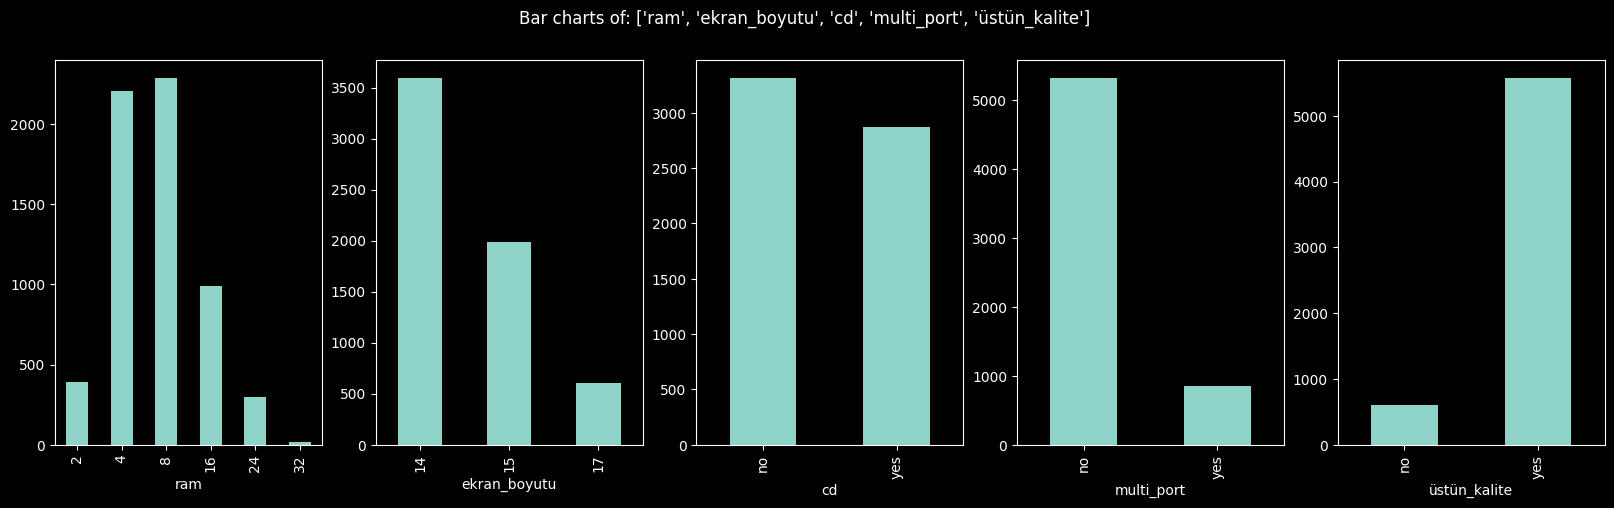

In [174]:
# fonksıyonu cagırma

PlotBarCharts(inpData=data, colsToPlot=['ram', 'ekran_boyutu', 'cd', 'multi_port','üstün_kalite'])


# <font color='red'>Çubuk Grafiklerin Yorumlanması

In [113]:
# *****Çubuk Grafiklerin Yorumlanması**** 

# Bu çubuk grafikler, Y eksenindeki her bir kategorinin frekanslarını ve X eksenindeki kategori adlarını temsil eder.
# İdeal çubuk grafikte her kategori karşılaştırılabilir frekansa sahiptir. Bu nedenle, 
# ML algoritmasının öğrenmesi için verilerde her kategori için yeterli satır vardır.

# Yalnızca bir baskın çubuğun olduğu ve diğer kategorilerin çok düşük sayılarda olduğu, 
# çok çarpık dağılım gösteren bir sütun varsa. Bu tür sütunlar, makine öğreniminde çok yardımcı olmayabilir. 
# Bunu korelasyon analizi bölümünde onaylıyoruz ve sütunu seçmek veya reddetmek için son bir çağrı yapıyoruz.

# Seçilen Kategorik Değişkenler: Tüm kategorik değişkenler daha fazla analiz için seçilir.

# 'ram', 'ekran', 'cd', 'çoklu'

# <font color='red'>Sürekli Değişkenlerin Histogram Grafiği

In [114]:
# Histogramları kullanarak verilerdeki tüm Sürekli Tahmin değişkenlerinin dağılımını görselleştirin

# Temel Veri Keşfi'ne dayalı olarak, Üç sürekli tahmin değişkeni 'hız', 'sbt_disk', 'reklamlar' ve 'trend'.

array([[<AxesSubplot: title={'center': 'hız'}>,
        <AxesSubplot: title={'center': 'sbt_disk'}>],
       [<AxesSubplot: title={'center': 'reklam_degeri'}>,
        <AxesSubplot: title={'center': 'trend_degeri'}>],
       [<AxesSubplot: title={'center': 'fiyat'}>, <AxesSubplot: >]],
      dtype=object)

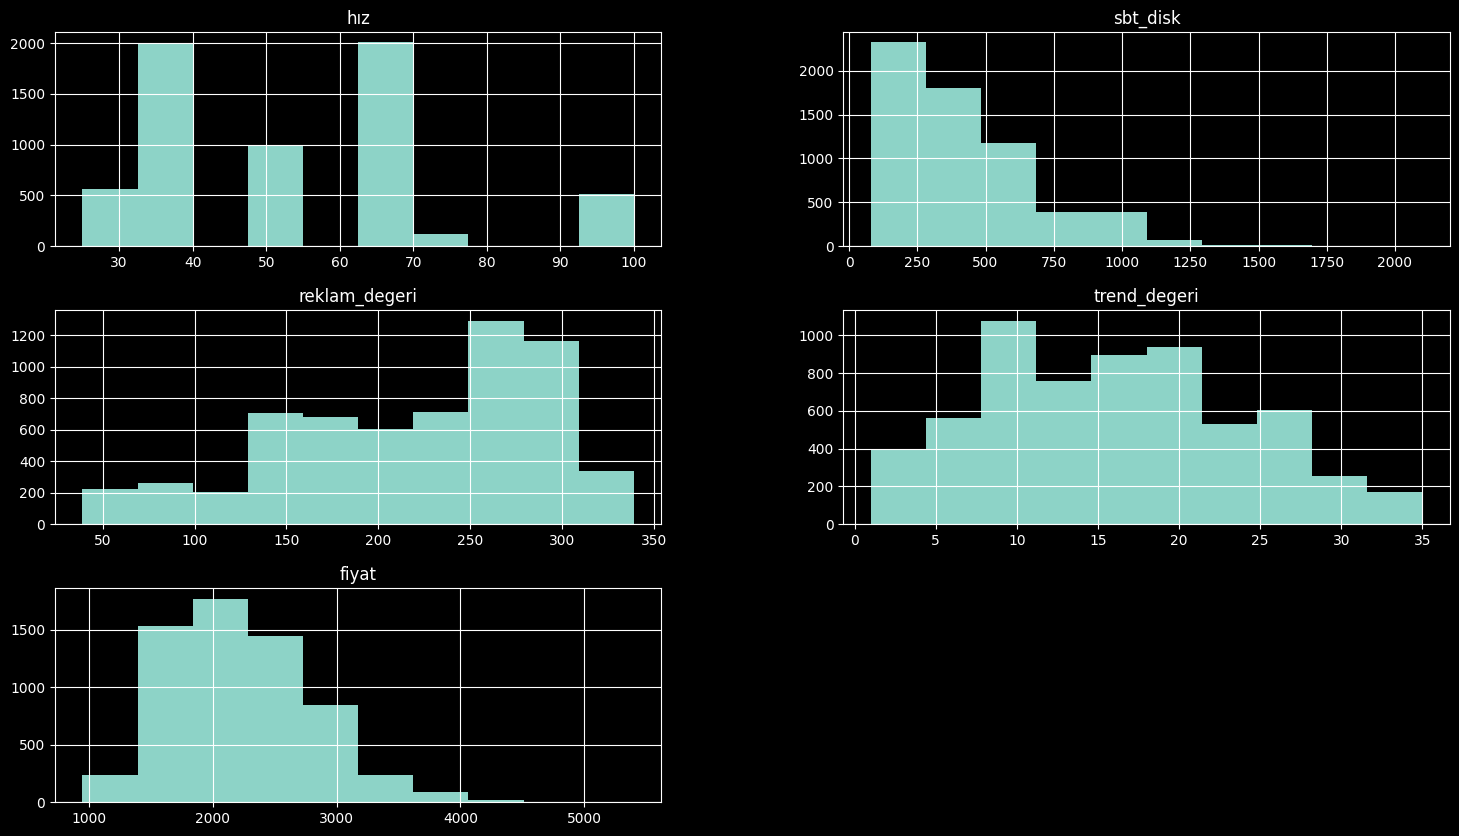

In [115]:
# Birden çok sütunun histogramlarını birlikte çizme

data.hist(['hız','sbt_disk','reklam_degeri','trend_degeri','fiyat'], figsize=(18,10))


# <font color='red'>Histogram Yorumu

In [116]:
# *****Histogram Yorumu*****


# Histogramlar bize tek bir sürekli değişken için veri dağılımını gösterir.

# X ekseni, değer aralığını gösterir ve Y ekseni, bu aralıktaki değer sayısını temsil eder. 
# Örneğin, yukarıdaki "hız" histogramında, 30 ile 40 arasında bir değere sahip verilerde yaklaşık 2000 tane hzı verisi vardır.

# Histogram için ideal sonuç, bir çan eğrisi veya hafif eğimli bir çan eğrisidir. 
# Çok fazla çarpıklık varsa, 
# aykırı değer tedavisi yapılmalı ve sütun yeniden incelenmelidir, bu da sorunu çözmezse, o zaman yalnızca sütunu reddedin.

# Seçilen Sürekli Değişkenler:

# reklam_degeri => Seçildi. Dağıtım iyi.
# hd =>  Dağıtım iyi.
# hız =>  Dağıtım iyi.
# trend =>  Dağıtım iyi.
#  fita => Dağıtım iyi.



# <font color='red'>Aykırı Değerler

In [117]:
# Aykırı Değerler

# Aykırı değerler, verilerdeki değerlerin çoğundan uzakta olan uç değerlerdir. Bunları histogramda kuyruk olarak görebilirsiniz.

# Aykırı değer, her seferinde bir sütun olarak ele alınmalıdır. Tedavi her sütun için biraz farklı olacağından.

# Aykırı değerleri neden tedavi etmeliyim?

# Aykırı değerler, makine öğrenimi modellerinin eğitimini saptırır. 
# Algoritma uç değeri sığdırmaya çalışırken, verilerin çoğundan uzaklaşır.

# Verilerdeki aykırı değerleri işlemek için aşağıda iki seçenek vardır.

# Seçenek-1: Aykırı Kayıtları Sil. Yalnızca birkaç satır kaybolmuşsa.
# Seçenek-2: Aykırı değerlere mantıksal bir iş değeri ekleyin


# Bu verilerde belirgin bir aykırı değer yoktur, dolayısıyla bu bölümde aykırı değer ele alınmaz.

# <font color='red'>Öznitelik Seçimi


In [118]:
# Öznitelik Seçimi

# Şimdi, Hedef değişkenle ilişkilendirilen en iyi sütunları (Özellikler) seçmenin zamanı geldi. 

# Bu doğrudan korelasyon değerleri
# veya ANOVA/Ki-Kare testleri ölçülerek yapılabilir. 
# Ancak, verileri daha iyi anlamak için 
# Target değişkeni ile diğer özniteliklerin her biri arasındaki ilişkiyi görselleştirmek her zaman yararlıdır.

# İki değişken arasındaki ilişkiyi görselleştirmek ve gücü istatistiksel olarak ölçmek için kullanılan teknikleri aşağıda 
# listeledik.

# Değişkenler arasındaki ilişkinin görsel keşfi

# Sürekli Vs Sürekli ---- Dağılım Grafiği
# Sürekli Vs Sürekli ---- Korelasyon matrisi

# Kategorik Vs Sürekli---- Kutu Grafiği
# Kategorik vs Sürekli---- ANOVA testi


# Kategorik Vs Kategorik ---- Gruplandırılmış Çubuk Grafikler
# Değişkenler arasındaki ilişki gücünün istatistiksel ölçümü
# Kategorik Vs Kategorik --- Ki-Kare testi
# Bu örnek olay incelemesinde Hedef değişken Süreklidir, dolayısıyla aşağıdaki iki senaryo mevcut olacaktır

# Sürekli Hedef Değişken ve Sürekli Öngörücü
# Sürekli Hedef Değişken ve Kategorik Öngörücü



# <font color='red'>Sürekli VS Sürekli Grafik Dağılımları


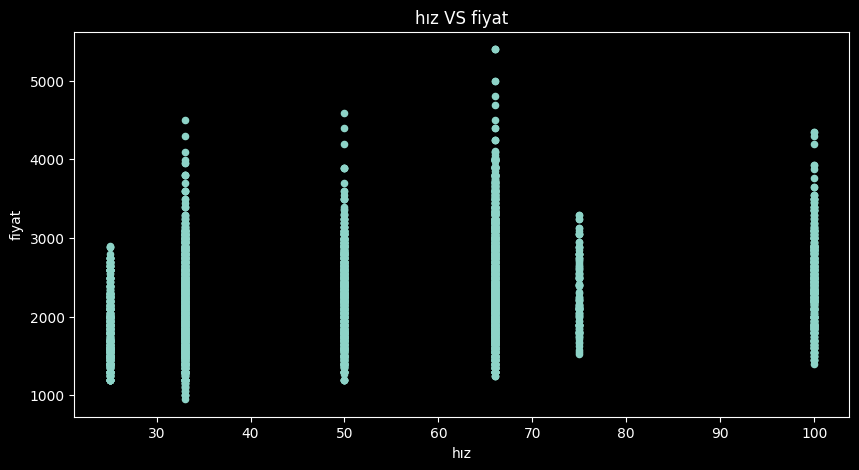

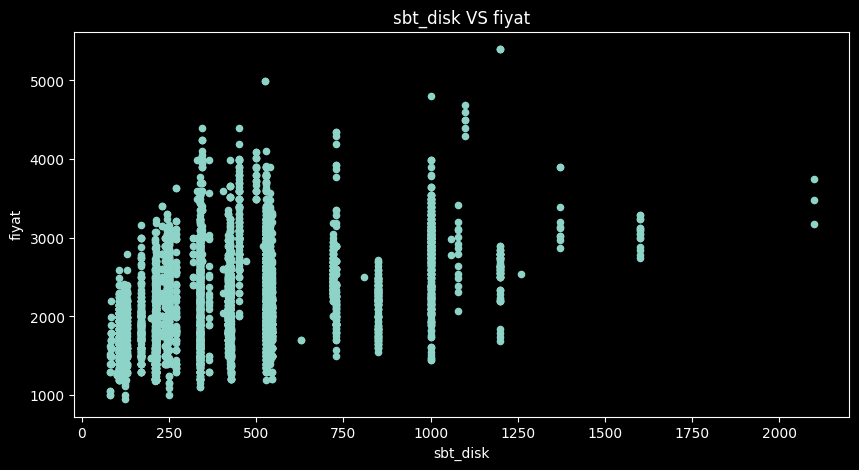

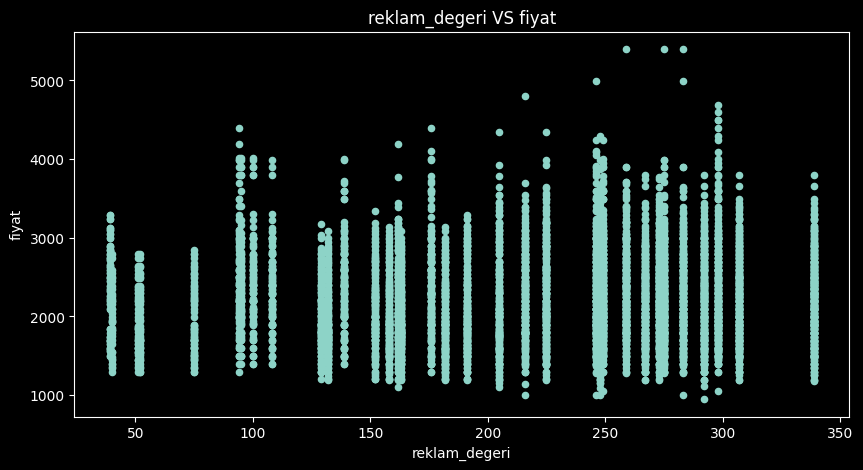

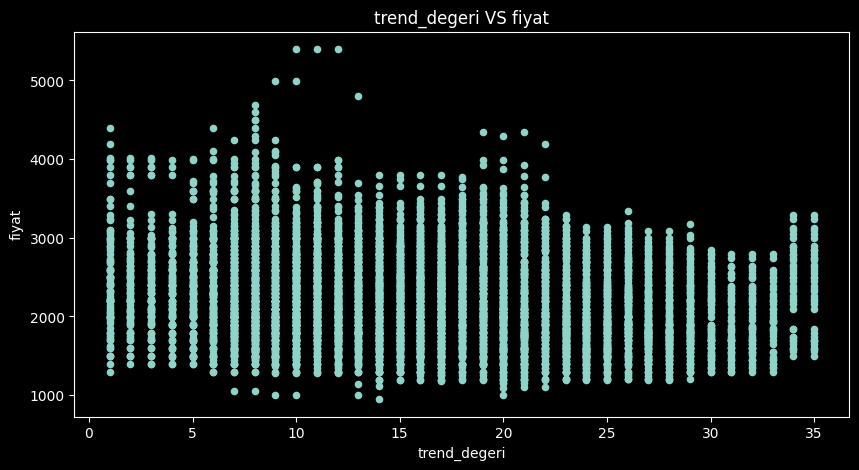

In [177]:
# İlişki keşfi: Sürekli Vs Sürekli -- Dağılım Grafikleri
# Hedef değişken sürekli ve tahmin edici de sürekli olduğunda, iki değişken arasındaki ilişkiyi dağılım grafiği 
# kullanarak görselleştirebilir ve pearson korelasyon değerini kullanarak ilişkinin gücünü ölçebiliriz.

surekli_Sutunlar = ['hız','sbt_disk','reklam_degeri','trend_degeri']

# Hedef değişkene(Target) karşı her öngörücü için dağılım grafiği çizme

for predictor in surekli_Sutunlar:
    data.plot.scatter(x = predictor, y ='fiyat', figsize=(10,5), title = predictor+" VS "+ 'fiyat')
    

# <font color='red'>Dağılım grafikleri yorumu


In [120]:
#  *****Dağılım grafikleri yorumu*****

# Bu dağılım grafiklerinde nelere dikkat etmelisiniz?

# Akım. Görünür bir trend olup olmadığını görmeye çalışmalısınız. Üç senaryo olabilir

# Artan Eğilim: 
    # Bu, her iki değişkenin de pozitif olarak ilişkili olduğu anlamına gelir. 
    # Daha basit bir ifadeyle birbirleriyle doğru orantılıdır, bir değer artarsa diğeri de artar. Bu makine öğrenimi için iyidir!

# Azalan Eğilim: 
    # Bu, her iki değişkenin de negatif ilişkili olduğu anlamına gelir. 
    # Daha basit bir ifadeyle, birbirleriyle ters orantılıdırlar, bir değer artarken diğeri azalır. Bu, makine öğrenimi için de iyidir!

# Trend Yok: 
    # Net bir artan veya azalan trend göremezsiniz. Bu, değişkenler arasında bir korelasyon olmadığı anlamına gelir. 
    # Bu nedenle öngörücü makine öğrenimi için kullanılamaz.

# Bu tabloya dayanarak, yararlı olup olmayacağına dair tahminci hakkında iyi bir fikir edinebilirsiniz. 
# Bunu korelasyon değerine bakarak onaylarsınız.


In [121]:
# *****Korelasyon değerini kullanarak İstatistiksel Özellik Seçimi (Sürekli Vs Sürekli)*****

# Pearson'ın korelasyon katsayısı, iki özellik x ve y (pay) arasındaki kovaryansın standart sapmalarının (payda) ürününe
# bölünmesiyle basitçe hesaplanabilir:

# Bu değer yalnızca iki sayısal sütun arasında hesaplanabilir.

# [-1,0) arasındaki korelasyon ters orantılı anlamına gelir, dağılım grafiği düşüş eğilimi gösterir
# (0,1] arasındaki korelasyon, doğrudan orantılı anlamına gelir, dağılım grafiği yukarı doğru bir eğilim gösterecektir.
# {# 0} yakınında korelasyon, İlişki yok anlamına gelir, dağılım grafiği net bir eğilim göstermez.
# İki değişken arasındaki korelasyon değeri büyüklük olarak > 0,5 ise, bu iyi bir ilişkiyi gösterir, işaretin önemi yoktur
 
# Hangi sütunların/özelliklerin/tahmin edicilerin söz konusu hedef değişkenle gerçekten ilişkili olduğunu kontrol etmek için 
# Hedef değişken ile diğer tüm öngörücü değişken(ler) arasındaki korelasyonları gözlemleriz.

# <font color='red'>Korelasyon matrisinin hesaplanması


In [122]:
# Korelasyon matrisinin hesaplanması

surekli_Sutunlar = ['fiyat','hız','sbt_disk','reklam_degeri','trend_degeri']

# Korelasyon matrisinin oluşturulması
korelasyonData = data[surekli_Sutunlar].corr()

korelasyonData

,fiyat,hız,sbt_disk,reklam_degeri,trend_degeri
fiyat,1.000000,0.298515,0.428845,0.056434,-0.201662
hız,0.298515,1.000000,0.370356,-0.214349,0.404830
sbt_disk,0.428845,0.370356,1.000000,-0.323342,0.577599
reklam_degeri,0.056434,-0.214349,-0.323342,1.000000,-0.320626
trend_degeri,-0.201662,0.404830,0.577599,-0.320626,1.000000


In [123]:
# Yalnızca Hedef Değişken ile mutlak korelasyonun > 0,5 olduğu sütunları filtreleme

# biz burda 0.5 yakın degeleri aldık
# herhangi bir değişken seçilmezse 0,5 eşiğini azaltın

korelasyonData['fiyat'][abs(korelasyonData['fiyat']) > 0.2 ]


fiyat           1.000000
hız             0.298515
sbt_disk        0.428845
trend_degeri   -0.201662
Name: fiyat, dtype: float64

# <font color='red'> Son Seçilen Sürekli Değişkenler

In [124]:
#  **** YORUM ***

# Son seçilen Sürekli sütunlar:

# "hız", "sbt_disk", "trend_degeri"

# <font color='red'>Kategorik Ve Sürekli Değişkenlerin Kutu Çizimleri

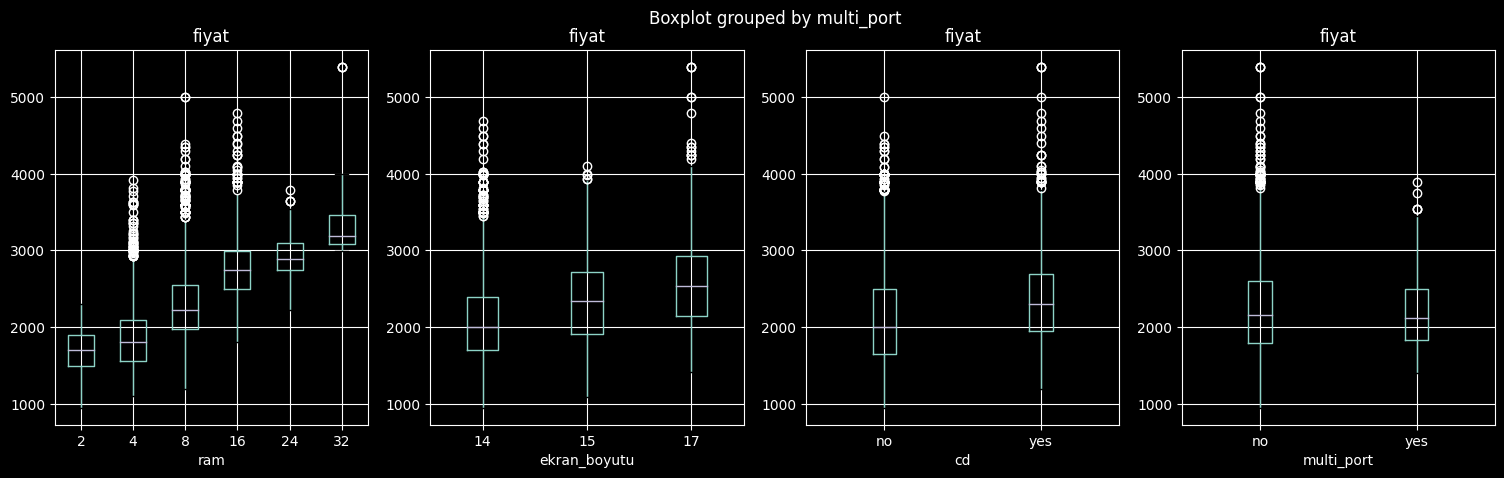

In [125]:
# ****İlişki keşfi: Kategorik ve Sürekli -- Kutu Çizimleri*****

# Hedef değişken Sürekli ve yordayıcı değişken Kategorik olduğunda, ilişkiyi Boxplots kullanarak analiz ederiz ve 
# ilişkinin gücünü Anova testi kullanarak ölçeriz

import matplotlib.pyplot as plt

Kategorik_Sütun_Listesi = ['ram', 'ekran_boyutu', 'cd', 'multi_port']

# Kategorik Hedef Değişken "fiyat" ve sürekli tahmin ediciler için kutu grafikleri
fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(Kategorik_Sütun_Listesi), figsize = (18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(Kategorik_Sütun_Listesi, range(len(Kategorik_Sütun_Listesi))):
    data.boxplot(column='fiyat', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])
    

# <font color='red'>Kutu Grafikleri Yorumu

In [126]:
# Kutu Grafikleri yorumu
# Bu kutu grafiklerinde nelere dikkat etmelisiniz?

# Bu grafikler, X Eksenindeki kategorilerin her biri için Y eksenindeki sürekli tahmin edicinin veri dağılımı 
# hakkında bir fikir verir.

# Dağılım her kategori için benzer görünüyorsa (Kutular aynı satırda), bu, sürekli değişkenin hedef 
# değişken üzerinde HİÇ etkisi olmadığı anlamına gelir. Bu nedenle, değişkenler birbiriyle ilişkili değildir.

# Öte yandan, dağılım her kategori için farklıysa (kutular aynı satırda değildir!). Bu değişkenlerin fiyat ile 
# ilişkili olabileceğini ima ediyor.

# Bu verilerde, "multi" dışında tüm kategorik tahmin ediciler Target değişkeni ile ilişkili görünüyor, kutular 
# birbirine yakın olduğu için bir sınır durumu gibi görünüyor.

# Aşağıdaki ANOVA testinin sonuçlarına bakarak bunu onaylıyoruz.

In [127]:
# ANOVA testi kullanılarak İstatistiksel Özellik Seçimi (Kategorik ve Sürekli)
# Verilen sürekli ve kategorik değişken arasında herhangi bir ilişki olup olmadığını kontrol etmek için 
# varyans analizi (ANOVA) yapılır.

# Varsayım(H0): Verilen değişkenler arasında NO ilişkisi vardır 
# (yani, sayısal Hedef değişkenin ortalama(ortalama) değerleri, kategorik Predictor değişkenindeki tüm gruplar için aynıdır)

# ANOVA Test sonucu: H0'ın doğru olma olasılığı

In [128]:
# Tüm kategorik değişkenlerle istatistiksel ilişkiyi bulmak için bir fonksiyon tanımlama

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Son seçilen tahmincilerin boş bir listesini oluşturma
    SelectedPredictors=[]
    
    print('##### ANOVA Sonuçlar ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # ANOVA P-Değeri <0,05 ise, bu H0'ı reddettiğimiz anlamına gelir
        if (AnovaResults[1] < 0.05):
            print(predictor, 'ile ilişkilidir', TargetVariable, '| P-Değeri:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'ile ilişkili DEĞİLDİR', TargetVariable, '| P-Değeri:', AnovaResults[1])
    
    return(SelectedPredictors)

In [129]:
# Hangi kategorik değişkenlerin hedefle ilişkili olduğunu kontrol etmek için işlevi çağırma

CategoricalPredictorList=['ram', 'ekran_boyutu', 'cd', 'multi_port']
FunctionAnova(inpData=data, 
              TargetVariable='fiyat', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Sonuçlar ##### 

ram ile ilişkilidir fiyat | P-Değeri: 0.0
ekran_boyutu ile ilişkilidir fiyat | P-Değeri: 1.2830206408407136e-129
cd ile ilişkilidir fiyat | P-Değeri: 8.113565801487017e-55
multi_port ile ilişkili DEĞİLDİR fiyat | P-Değeri: 0.19076936432204794


['ram', 'ekran_boyutu', 'cd']

In [130]:
# ANOVA'nın sonuçları, yukarıdaki kutu çizimlerini kullanarak görsel analizimizi doğrulamaktadır.

# "Multi" dışında tüm kategorik değişkenler Target değişkeni ile ilişkilidir. Bu, 
# kutu çizimlerine bakarak tahmin ettiğimiz bir şey!

# Son seçilen Kategorik sütunlar:

# 'ram', 'ekran', 'cd'

# <font color='red'>Makine Öğrenimi için son tahmin edicileri seçme


In [131]:
#  ******** Makine Öğrenimi için son tahmin edicileri seçme*****

#  Yukarıdaki testlere göre, makine öğrenimi için son sütunların seçilmesi


SelectedColumns=['hız','sbt_disk','trend_degeri','ram', 'ekran_boyutu', 'cd']

# Son sütunları seçme
DataForML=data[SelectedColumns]
DataForML.head()


,hız,sbt_disk,trend_degeri,ram,ekran_boyutu,cd
0,25,80,1,4,14,no
1,33,85,1,2,14,no
2,25,170,1,4,15,no
3,25,170,1,8,14,no
4,33,340,1,16,14,no


In [132]:
# Dağıtım sırasında referans olması için bu son verileri kaydetme
DataForML.to_pickle('DataForML.pkl')

# <font color='blue'>2) MAKİNE ÖĞRENİMİ İÇİN VERİ ÖN İŞLEME

In [133]:
# Makine Öğrenimi için Veri Ön İşleme 
# Veriler makine öğrenimi için kullanılmadan önce öngörücü değişkenlerde gerçekleştirilen adımların listesi

# Her Sıralı Kategorik sütunu sayısal sütuna dönüştürme
# İkili nominal Kategorik sütunları 1/0 eşleme kullanarak sayısala dönüştürme
# Diğer tüm nominal kategorik sütunları pd.get_dummies() kullanarak sayısala dönüştürme
# Veri Dönüştürme (Opsiyonel): Standardizasyon/Normalleştirme/log/sqrt. KNN veya Neural Networks gibi mesafeye dayalı
# algoritmalar kullanıyorsanız önemlidir.
# Bu verilerde string formatında Ordinal kategorik değişken yoktur.


In [134]:
# ****İkili nominal değişkeni 1/0 eşleme kullanarak sayısala dönüştürme****

# İkili nominal değerleri sayısal DataForML'ye 
DataForML['cd'].replace({'no':0, 'yes':1}, inplace=True)



C:\Users\ozbdk\AppData\Local\Temp\ipykernel_8952\747595914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['cd'].replace({'no':0, 'yes':1}, inplace=True)


In [135]:
# *****Nominal değişkeni get_dummies() kullanarak sayısala dönüştürme****


# Kukla değişkenler kullanarak tüm nominal değişkenleri aynı anda ele alma
DataForML_Numeric = pd.get_dummies(DataForML)

# Verilere Hedef Değişken ekleme
DataForML_Numeric['fiyat'] = data['fiyat']


# Örnek satırları yazdırma
DataForML_Numeric.head()


,hız,sbt_disk,trend_degeri,ram,ekran_boyutu,cd,fiyat
0,25,80,1,4,14,0,1499
1,33,85,1,2,14,0,1795
2,25,170,1,4,15,0,1595
3,25,170,1,8,14,0,1849
4,33,340,1,16,14,0,3295


# <font color='blue'>3) MODELİN OLUŞTURLUMASI VE EĞİTİLMESİ

In [136]:
# *****Makine Öğrenimi: Verileri Eğitim ve Test örneğine ayırma****


# Modeli oluşturmak için tüm verileri kullanmıyoruz. Bazı veriler rastgele seçilir ve
# modelin ne kadar iyi olduğunu kontrol etmek için bir kenara bırakılır. Bu, Test Verileri olarak bilinir ve geri 
# kalan veriler, modelin üzerine inşa edildiği Eğitim verileri olarak adlandırılır. Tipik olarak verilerin %70'i Eğitim 
# verileri olarak kullanılır ve geri kalan %30'u Tesing verileri olarak kullanılır.


In [137]:
# Referansımız için tüm sütun adlarını yazdırma

DataForML_Numeric.columns

Index(['hız', 'sbt_disk', 'trend_degeri', 'ram', 'ekran_boyutu', 'cd',
       'fiyat'],
      dtype='object')

# <font color='red'> Hedef Değişken ve Tahmin değişkenlerimizin belirlenmesi

In [138]:
# Ayrı Hedef Değişken ve Tahmin Değişkenleri belirlenmesi

# y = bağımlı değişken
# X = bağımsız değiken

# fiyat sutunu hariç tüm columnları alacak
X = DataForML_Numeric.drop(['fiyat'],axis = 1)

# sadece fiyat stununu alacak
y = DataForML_Numeric.iloc[:,6]


# Verileri eğitim ve test setine ayırma

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 428)

In [139]:
X.head()

,hız,sbt_disk,trend_degeri,ram,ekran_boyutu,cd
0,25,80,1,4,14,0
1,33,85,1,2,14,0
2,25,170,1,4,15,0
3,25,170,1,8,14,0
4,33,340,1,16,14,0


In [140]:
y.head()

0    1499
1    1795
2    1595
3    1849
4    3295
Name: fiyat, dtype: int64

# <font color='red'>Normalizasyon

In [141]:
#  *****Verilerin standardizasyonu/normalizasyonu*****

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Bu verilerde Min Maks Normalleştirme seçtik


MMS = MinMaxScaler()

PredictorScalerFit = MMS.fit(X)

# X'in standartlaştırılmış değerlerini oluşturma

X = PredictorScalerFit.transform(X)

# Verileri eğitim ve test setine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4328, 6)
(4328,)
(1855, 6)
(1855,)


# <font color='red'>Linear Regresyon Modeli

In [143]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()



# Eğitim Verileri üzerinde model oluşturma

LREG = RegModel.fit(X_train,y_train)
prediction = LREG.predict(X_test)


# Standartlaştırılmış değerlerin orijinal ölçeğe alınması

from sklearn import metrics

# Eğitilen model Tahmin yazıdrma 
print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, LREG.predict(X_train)))


 Tahmin Skoru: 0.6980942152989374


# <font color='red'>Cross Validation Fonksiyonuation Fonksiyonu

In [182]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold, train_test_split, cross_val_predict,cross_val_score


# Verilerimiz eğitirken model veri setimiz üzerinde ezber yapmış olabilir yani diğer bir deyişle, 
# modelimizin genelleme yeteneğinin yüksek olmasını sadece o veri seti üzerinde iyi çalışmasını 
# değil hiç görmediği başka veri setleri üzerinde de iyi sonuçlar vermeyebilir. Bunu önlemek için her modelde 
# kullanabileceğimiz cross validation işlemi yapan bir fonksiyonu tanımladık. Veri setimizi 5 parçaya bölüm tahmin yapıyor. 
# Böylelikle başka veri geldiği zaman tahminde sapma olmayacak

def crossValidationFunction(model):
    k = 5
    k_folds = KFold(n_splits = k, random_state = 49, shuffle = True)
    scores = cross_val_score(model, X, y, cv = k_folds)
    for i in scores:
        print("Cross Validation Skoru:", i)
    return print("\033[95m\x1B[1m\nOrt CV Skoru: ", scores.mean())


# <font color='red'>Linear Regresyon Cross Validation

In [145]:
# cross validation RandomForestRe><<gressor

crossValidationFunction(RegModel)

Cross Validation Skoru: 0.7066876101937415
Cross Validation Skoru: 0.6899580953674274
Cross Validation Skoru: 0.7124861843048935
Cross Validation Skoru: 0.7141169376634323
Cross Validation Skoru: 0.6672877912527373

Ort CV Skoru:  0.6981073237564465


# <font color='red'>LinearModel Başarı Yorumu
    
<font color='black'>Linaer ResgresyonModelimizin başarı iyi ve aşırı uyum(Overfiting) problemi yok

# <font color='red'>Decision Trees(Karar ağaçları) Modeli

 Tahmin Skoru: 0.8988475836613017


C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


<AxesSubplot: >

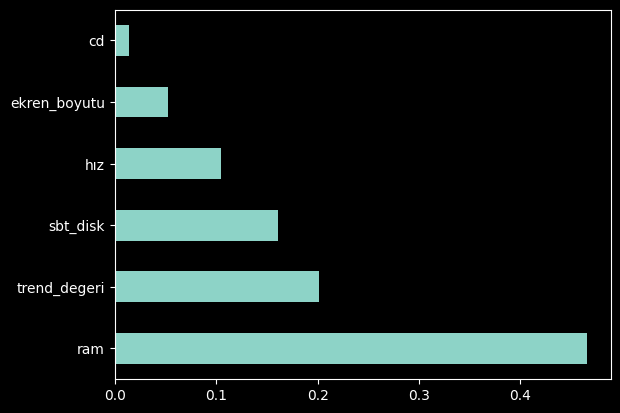

In [146]:
from sklearn.tree import DecisionTreeRegressor
DecModel = DecisionTreeRegressor(max_depth = 10,criterion = 'mse')


# verileri Eğitme
DT = DecModel.fit(X_train,y_train)
prediction = DT.predict(X_test)

from sklearn import metrics
# tahmin
print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, DT.predict(X_train)))

# En önemli 10 sütun için özellik öneminin çizilmesi
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index = ['hız', 'sbt_disk', 'trend_degeri', 'ram', 'ekren_boyutu', 'cd'])
feature_importances.nlargest(10).plot(kind = 'barh')

# <font color='red'> Decision Trees Modeli Cross Validation

In [147]:
crossValidationFunction(DecModel)

Cross Validation Skoru: 0.817669368288081
Cross Validation Skoru: 0.8167759715811806
Cross Validation Skoru: 0.8320463702000832
Cross Validation Skoru: 0.8411720644594353
Cross Validation Skoru: 0.8093146503946533

Ort CV Skoru:  0.8233956849846866


C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='sq

# <font color='red'>Decision Trees Modeli Yorumu
Model başrısı iyi ama aşırı uyum(Overfiting) problemi oldu başarı 0.89'dan 0.82 düştü 

# <font color='red'>RandomForestRegressor Modeli

In [148]:
from sklearn.ensemble import RandomForestRegressor
RadForModel = RandomForestRegressor(max_depth = 10, n_estimators = 100,criterion = 'mse')

# RandomForest Modelin Eğitilmesi
RF = RadForModel.fit(X_train,y_train)
prediction = RF.predict(X_test)

from sklearn import metrics

# tahmin
print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, LREG.predict(X_train)))

C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


 Tahmin Skoru: 0.6980942152989374


# <font color='red'>RandomForestRegressor Modeli Cross Validation


In [149]:
crossValidationFunction(RadForModel)

C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\ozbdk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` w

Cross Validation Skoru: 0.8605295792591613
Cross Validation Skoru: 0.8652804951985247
Cross Validation Skoru: 0.8705365408218801
Cross Validation Skoru: 0.8657126406585532
Cross Validation Skoru: 0.8539604024966143

Ort CV Skoru:  0.8632039316869466


# <font color='red'>RandomForestRegressor Modeliin Yorumlanması

Moelim başarı şuan yaptığım modeller arsında en iyi başarıyı verdi 

# <font color='red'>AdaBoostRegressor Modeli 

In [150]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor


DTR = DecisionTreeRegressor(max_depth=15)
AdaBoosModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)


# Creating the model on Training Data
AB = AdaBoosModel.fit(X_train,y_train)
prediction = AB.predict(X_test)

from sklearn import metrics

print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, LREG.predict(X_train)))

 Tahmin Skoru: 0.6980942152989374


# <font color='red'>AdaBoostRegressor Modeli Cross Validation

In [151]:

crossValidationFunction(AdaBoosModel)


Cross Validation Skoru: 0.8547550741985342
Cross Validation Skoru: 0.852445362942475
Cross Validation Skoru: 0.8725693471184934
Cross Validation Skoru: 0.8604304596605945
Cross Validation Skoru: 0.8551457351089979

Ort CV Skoru:  0.8590691958058191


# <font color='red'> K-En Yakın Komşu(KNN

In [152]:
from sklearn.neighbors import KNeighborsRegressor
KNNModel = KNeighborsRegressor(n_neighbors=3)


KNN = KNNModel.fit(X_train,y_train)
prediction = KNN.predict(X_test)

from sklearn import metrics

print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, LREG.predict(X_train)))

 Tahmin Skoru: 0.6980942152989374


# <font color='red'>K-En Yakın Komşu(KNN) Cross Validation

In [153]:
crossValidationFunction(KNNModel)

Cross Validation Skoru: 0.8145205204713344
Cross Validation Skoru: 0.8045146452583043
Cross Validation Skoru: 0.8098389995915677
Cross Validation Skoru: 0.813223094187817
Cross Validation Skoru: 0.7899998847809395

Ort CV Skoru:  0.8064194288579927


# <font color='red'>Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB

NaviBModel = GaussianNB()

NBM = NaviBModel.fit(X_train,y_train)
prediction = NBM.predict(X_test)

from sklearn import metrics

print('\033[95m\x1B[1m Tahmin Skoru:',metrics.r2_score(y_train, LREG.predict(X_train)))

 Tahmin Skoru: 0.6980942152989374


# <font color='red'>Naive Bayes Cross Validation

In [155]:
crossValidationFunction(NaviBModel)

Cross Validation Skoru: 0.043654001616814875
Cross Validation Skoru: 0.03637833468067906
Cross Validation Skoru: 0.03395311236863379
Cross Validation Skoru: 0.03398058252427184
Cross Validation Skoru: 0.05501618122977346

Ort CV Skoru:  0.040596442484034614


# <font color='red'>Modellerin Doğruluk Tabolusu


<img src="images/model_dogruluk_tablosu.png"/>